# Real Estate Property Price Prediction Model

This Multiple Linear Regression Model shall predict the Housing Property Price using multiple features related to Real Estate Properties and also show the accuracy of model.

In [102]:
#Importing the requisite Libraries/Packages:
import pandas as pd
import numpy as np
import seaborn as sbn
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
%matplotlib inline

### Importing the Dataset :

In [103]:
#Reading the .csv data file using pandas into its data structure i.e.'DataFrames':
df=pd.read_csv("Housing.csv")

### Superficial Data Analysis :

In [104]:
#Checking the dimensions of the DataFrame i.e. Number of rows and columns
df.shape

(545, 13)

In [105]:
#Displaying the first 5 rows of our data stored in the DataFrame:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [106]:
#Collecting the superficial knowledge of our data calculated over the values present in each column:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [107]:
#Inspecting the data for the null values or no-value column:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### Matrix Data Analysis :

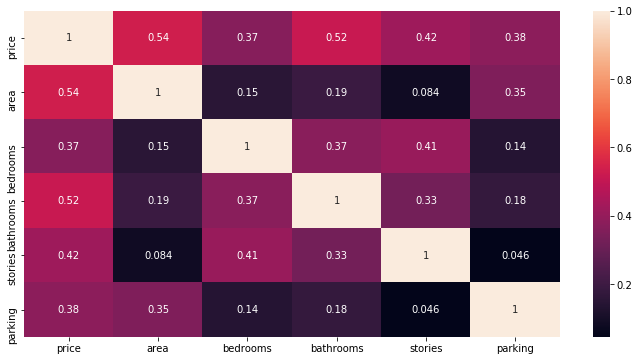

In [108]:
#Seaborn Heatmap to analyse data via Correlation Cofficients: 
plt.figure(figsize=(12,6))
sbn.heatmap(df.corr(), annot=True)

### Graphical Data Analysis :

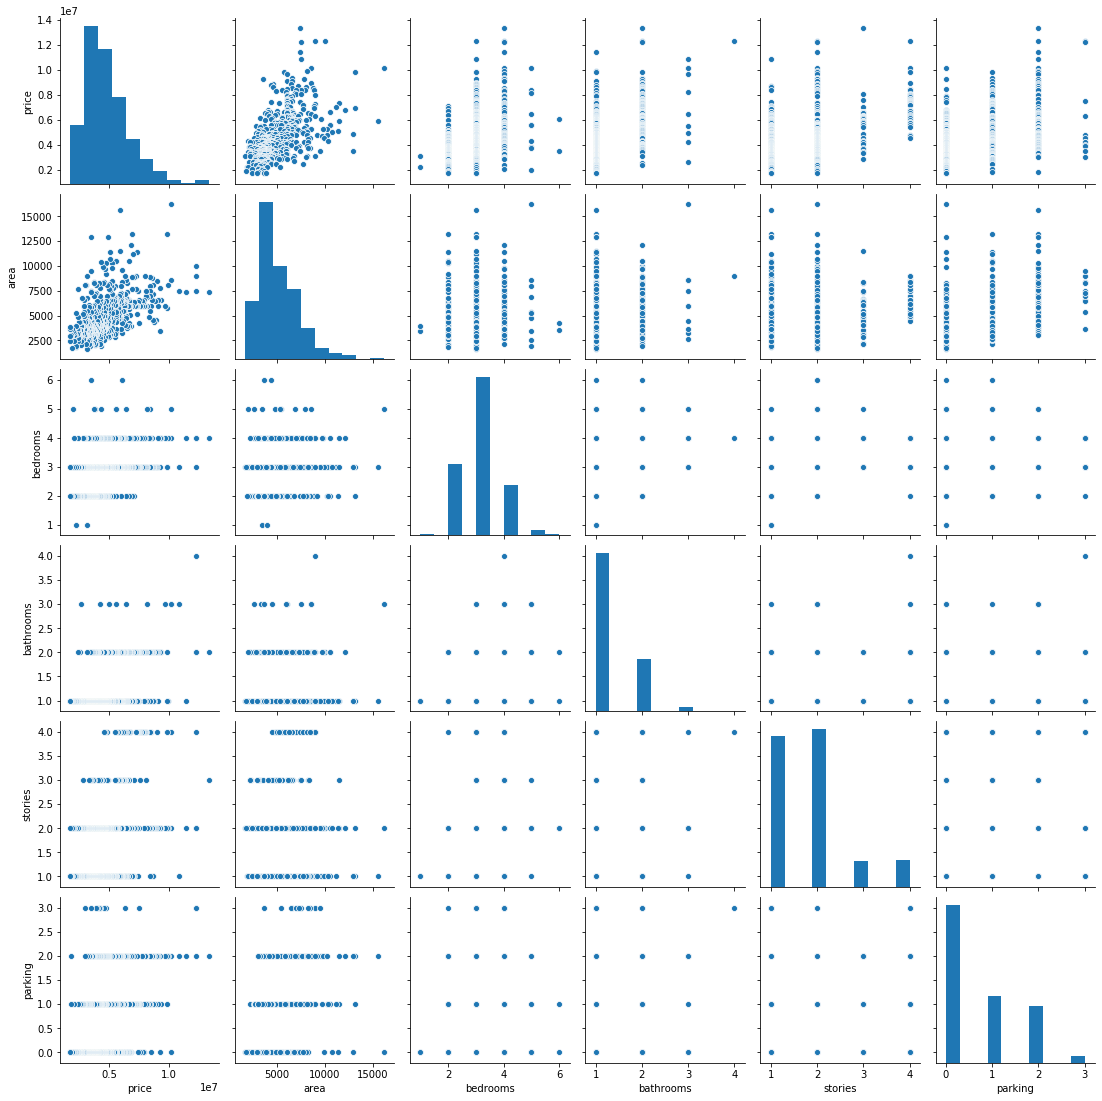

In [114]:
#Graphical analysis of data to understand the existing relations using various plots:
sbn.pairplot(df)
plt.show()

### Attributes and Labels :

In [115]:
#Splitting the features into 'Attributes' and 'Labels':
x=df[['area','bedrooms','bathrooms','stories','parking']]
y=df['price']

### Training and Testing Dataset :

In [116]:
#Splitting the dataset into Training Dataset and Testing Dataset:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Model Training :

In [117]:
#Creating the Instance of Linear Regression Model and training it using Training Dataset:
regressor = LinearRegression()  
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Optimal Coefficients :

In [118]:
#Displaying the Optimal Cofficients of Linear Regression Model of each Attribute: 
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
area,3.470613e+02
bedrooms,2.289993e+05
bathrooms,1.189637e+06
stories,5.260319e+05
parking,3.498712e+05


### Model Testing & Error Calculation :

In [127]:
#Testing the model using Testing Dataset and calculating the errors:
y_predicted=regressor.predict(x_test)
df1=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_predicted,'Absolute Error':(y_predicted-y_test),'Squared Error':(y_predicted-y_test)**2})
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predicted))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
df1.head()

Mean Absolute Error: 797203.3142451214
Mean Squared Error: 1173790361911.623
Root Mean Squared Error: 1083416.0613132995


,Actual Value,Predicted Value,Absolute Error,Squared Error
239,4585000,4.251239e+06,-3.337614e+05,1.113967e+11
113,6083000,6.025562e+06,-5.743770e+04,3.299090e+09
325,4007500,3.942954e+06,-6.454633e+04,4.166229e+09
66,6930000,6.689171e+06,-2.408288e+05,5.799852e+10
479,2940000,4.012366e+06,1.072366e+06,1.149969e+12


### Graphical Depiction of Model Inaccuracy :

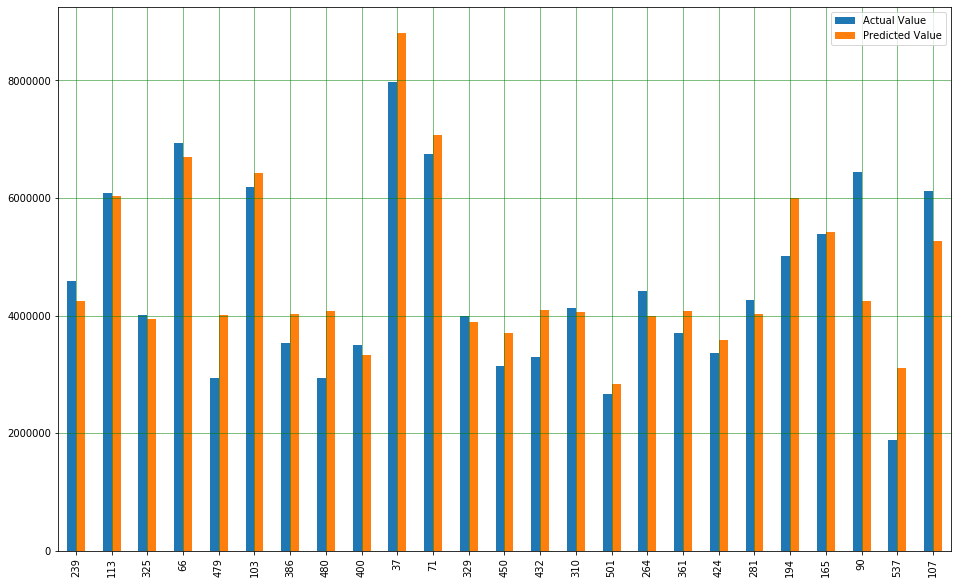

In [125]:
#Comparison analysis of Actual and Predicted values of the model using Bar Graphs:
df2=df1.head(25)
df2.plot(y=['Actual Value','Predicted Value'],kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

*Note: It can be inferred here that using multiple 'Attributes' to predict the 'Label' leads to increment in accuracy of our    Linear Regression Model which can be seen through RSME value in both, Linear Regression Model of Two Variables and Multiple Linear Regression Model.